# About This Notebook

This notebook is designed to facilitate the use of pychip locally, without using the App. 
<br>
After setting up your kernel and importing required packages there are two main paths:
1. If you have an image you would like to perform few shot analysis on, but do not yet have a support set, you will want to use the [Starting From Scratch](#nosupportset) section
2. If you have an existing support set you would like to use, skip to the [Use Existing Support Set](#existingsupport) section

The main difference between these two options is the establishing of file paths required for the code to run.

# Optional: Set up virtual environment



### Here are steps to ensure that your virtual environment is set up as a kernel for running this notebook:
1. Install and activate conda
2. Run the following commands to create and activate an environment: 
    - conda create -n myenv
    - conda activate myenv
4. Navigate to the same folder with the requirements.txt file and run the following commands to set up the environment: 
    - conda install pip
    - pip3 install -r requirements.txt
5. Run the following commands to set up a kernel that can be used in jupyter notebook:
    - pip install --user ipykernel
    - python -m ipykernel install --user --name=myenv
6. Now you should see 'myenv' as an option in the dropdown list of available Kernels when jupyter notebook is running

# Import Required Packages

Note: This is designed to be run from within the few-shot-electron-microscopy directory. If your jupyter notebook is running from elsewhere, you will need to adjust these import statements.

In [1]:
from modules.image_mani import chips_genesis, img_param, convert_to_jpg, preprocess
from modules.pipeline_utils import support_genesis, predictions, color_image, build_skeleton
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import shutil
from IPython.display import Image, display, Markdown
%matplotlib inline

# set model and encoder
encoder = 'resnet101'

<a id="nosupportset"></a>
# Starting From Scratch


This section will guide you through the following steps:
1. Designate filepaths and names for your inputs and outputs
1. Create the file structure
1. Run or skip the image preprocessing
1. Indicate how many rows/columns the image should be splintered into
1. Create and save the image chips
1. Choose chips to populate the support set
1. Create and save the support set
1. Run the few shot classifier



### Step 1: Designate filepaths and names for inputs and outputs

you may use exact or relative locations for these paths

In [2]:
# data_path is the location of the image that you want to analyze:
data_path = "./Testing/images"

# image_name is the name of the image within the data_path folder that you want to analyze:
img_name = "STO-Ge-HAADF.jpg"

# main_path is the location of the file structure to be created
main_path = './Testing'

# folder_name is the name of the filesystem that will be created within the main_path directory
# this will contain subfolders for the preprocessed and chipped images, as well as the results
folder_name = 'feb_2022_test'

# assign file names for the results csv and the colored result image
csv_name = "results_csv.csv"
results_img_name = "results_img.jpg"

### Step 2: Create the file structure

In [3]:
paths, folders, structure = build_skeleton(structure='S2', main_path=main_path, data_path=data_path, folder_name=folder_name)
paths['img_name'] = img_name

### Step 3: Preprocessing

Only run one of the following two cells. the first will skip preprocessing, the second will run it

In [4]:
# to skip preprocessing, run this cell:
paths['get_this_img_params'] = paths['has_original_imgs']
paths['chip_this_img'] = paths['has_original_imgs']

In [ ]:
# to use preprocessing, run this cell:
##### This is currently broken, problem with preprocess function paths #####
paths['path_to_clahe'] = paths['has_clahe_imgs']
preprocess(paths, prep_type='clahe')

### Step 4: Indicate how many rows/columns the image should be splintered into

You will be able to preview the size of chip created, and re run this section as many times as you'd like before creating the actual chips

In [5]:
number_of_columns_to_chip = 33

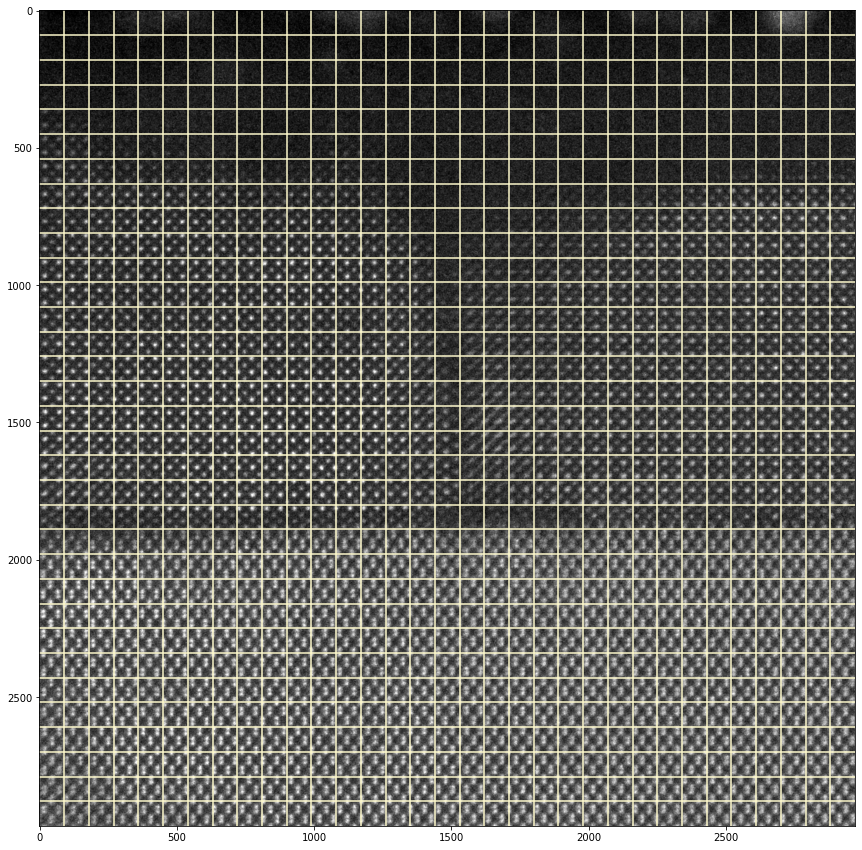

In [6]:
# Preview the chip size 
# Assumes image is square. If not, there may be distortions in this preview that will not appear in the final chipped image
img_path = data_path + '/' + img_name

img = mpimg.imread(img_path)
width = img.shape[0]
chipsize = width/number_of_columns_to_chip
x_grid_lst = np.linspace(chipsize, width-chipsize, number_of_columns_to_chip-1)

plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
for x_loc in x_grid_lst:
    plt.axvline(x=x_loc, c='lemonchiffon')
    plt.axhline(y=x_loc, c='lemonchiffon')

### Step 5: Create and save the image chips

Once you are happy with the chip size, run this to create the chips

In [7]:
params = img_param(paths, number_of_columns_to_chip, save_crop=True)
chips_genesis(paths, params)

### Step 6: Choose chips to populate the support set

Chip names have the format R#C# (row# column#)
<br>
for an image with 8rows and 8 columns:
   - the top left chip is R0C0
   - the top right chip is R0C8
   - the bottom left chip is R8C0
   - the bottom right chip is R8C8
   
<br>
#### IMPORTANT NOTE: currently, in the image_mani.image_param function, the R and C are backwards, so R means column and C means row. Make changes accordingly.


<br>
Adjust the following support dictionary as necessary. You will need one key for each support set. Each key maps to a list of representative chips using the above naming convention

In [8]:
support_dict = {'set_1_label': ['R3C0', 'R19C4', 'R31C0'],
                'set_2_label': ['R0C10', 'R10C10', 'R18C12'],
                'set_3_label': ['R0C21', 'R5C30', 'R29C29']}

### Step 7: Create and save the support set

In [9]:
# this checks if there are existing folders with these support sets and deletes them before recreating
for key in support_dict.keys():
    path_to_support_set = main_path + '/' + folder_name + f'/support/{key}'
    if os.path.isdir(path_to_support_set):
        shutil.rmtree(path_to_support_set)
support_genesis(paths, support_dict=support_dict)

**set_1_label**

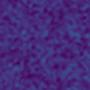

./Testing/feb_2022_test/support/set_1_label\R19C4.jpg


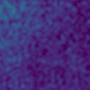

./Testing/feb_2022_test/support/set_1_label\R31C0.jpg


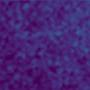

./Testing/feb_2022_test/support/set_1_label\R3C0.jpg


**set_2_label**

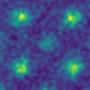

./Testing/feb_2022_test/support/set_2_label\R0C10.jpg


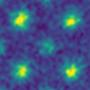

./Testing/feb_2022_test/support/set_2_label\R10C10.jpg


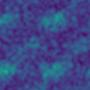

./Testing/feb_2022_test/support/set_2_label\R18C12.jpg


**set_3_label**

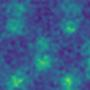

./Testing/feb_2022_test/support/set_3_label\R0C21.jpg


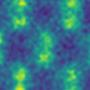

./Testing/feb_2022_test/support/set_3_label\R29C29.jpg


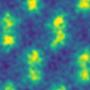

./Testing/feb_2022_test/support/set_3_label\R5C30.jpg


In [10]:
# view the support set images, to confirm they are correct:
# if not as intended, try swapping the R and C values
for key in support_dict.keys():
    support_path = main_path + '/' + folder_name + f'/support/{key}/'
    images_set = glob.glob(support_path + '*.jpg')
    display(Markdown(f'**{key}**'))
    for support_image in images_set:
        display(Image(filename=support_image))
        print(support_image)

### Step 8: Run the few shot classifier

In [11]:
paths.keys()

dict_keys(['has_converted_imgs', 'preprocess_this_img', 'has_clahe_imgs', 'get_this_img_params', 'has_cropped_imgs', 'chip_this_img', 'has_img_chips', 'has_results', 'has_original_imgs', 'has_support_set_folders', 'img_name'])

In [12]:
results = predictions(paths, encoder='resnet101', ret=True, seed=75, save_results_as=csv_name)
#color_image(paths, results, params, use_cropped=True, save_as=results_img_name)

KeyError: 'has_labels_folders'

<a id="existingsupport"></a>
# Use Existing Support Set

- designate chip path
- designate path to folder with support sets as subdirectories

This section will guide you through the following steps:
1. Designate filepaths and names for your inputs and outputs
1. Create the file structure
1. Confirm support sets
1. Run or skip the image preprocessing
1. Indicate how many rows/columns the image should be splintered into
1. Create and save the image chips
1. Run the few shot classifier


### Step 1: Designate filepaths and names for inputs and outputs

you may use exact or relative locations for these paths

In [14]:
# data_path is the location of the image that you want to analyze:
data_path = "./Testing/images"

# image_name is the name of the image within the data_path folder that you want to analyze:
img_name = "STO-Ge-HAADF.jpg"

# main_path is the location of the file structure to be created
main_path = './Testing'

# folder_name is the name of the filesystem that will be created within the main_path directory
# this will contain subfolders for the preprocessed and chipped images, as well as the results
folder_name = 'feb_2022_test'

# support_path is the location of the support sets. It should have one sub folder for each set:
support_path = './Testing/support'

# assign file names for the results csv and the colored result image
csv_name = "results_csv.csv"
results_img_name = "results_img.jpg"

### Step 2: Create the file structure

In [15]:
paths, folders, structure = build_skeleton(structure='S2', main_path=main_path, data_path=data_path, folder_name=folder_name, support_path=support_path)
paths['img_name'] = img_name

### Step 3: Confirm support sets

**GE**

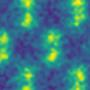

./Testing/support/GE\cropX_15_Y_27.jpg


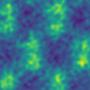

./Testing/support/GE\cropX_30_Y_23.jpg


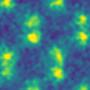

./Testing/support/GE\cropX_9_Y_32.jpg


**PtC**

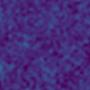

./Testing/support/PtC\cropX_13_Y_5.jpg


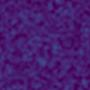

./Testing/support/PtC\cropX_17_Y_1.jpg


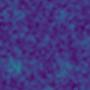

./Testing/support/PtC\cropX_29_Y_6.jpg


**STO**

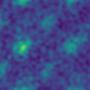

./Testing/support/STO\cropX_15_Y_13.jpg


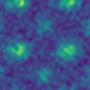

./Testing/support/STO\cropX_24_Y_15.jpg


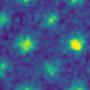

./Testing/support/STO\cropX_5_Y_18.jpg


In [16]:
if os.path.isdir(support_path):
    support_sets = os.listdir(support_path)
    for support_set in support_sets:
        support_set_path = support_path + f'/{support_set}/'
        images_set = glob.glob(support_set_path + '*.jpg')
        display(Markdown(f'**{support_set}**'))
        for support_image in images_set:
            display(Image(filename=support_image))
            print(support_image)
else:
    print("support_path is not valid")

### Step 4: Preprocessing

Only run one of the following two cells. the first will skip preprocessing, the second will run it

In [17]:
# to skip preprocessing, run this cell:
paths['get_this_img_params'] = paths['has_original_imgs']
paths['chip_this_img'] = paths['has_original_imgs']

In [ ]:
# to use preprocessing, run this cell:
##### This function is currently broken #####
preprocess(paths, prep_type='clahe')

### Step 5: Indicate how many rows/columns the image should be splintered into

You will be able to preview the size of chip created, and re run this section as many times as you'd like before creating the actual chips

In [18]:
number_of_columns_to_chip = 33

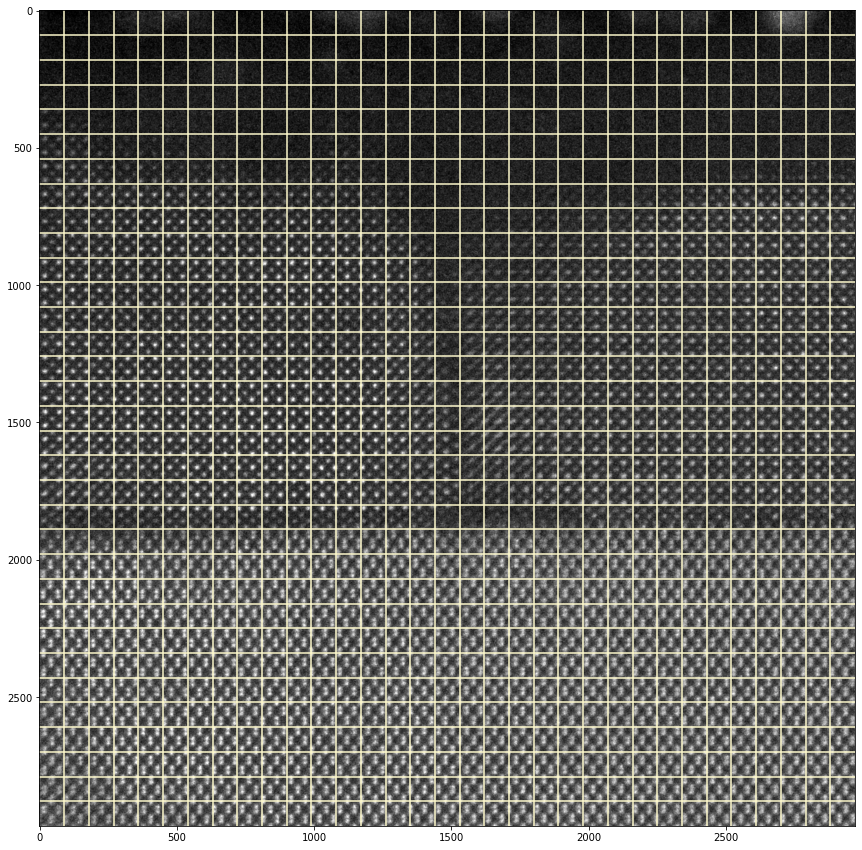

In [19]:
# Preview the chip size 
# Assumes image is square. If not, there may be distortions in this preview that will not appear in the final chipped image
img_path = data_path + '/' + img_name

img = mpimg.imread(img_path)
width = img.shape[0]
chipsize = width/number_of_columns_to_chip
x_grid_lst = np.linspace(chipsize, width-chipsize, number_of_columns_to_chip-1)

plt.figure(figsize=(15, 15))
imgplot = plt.imshow(img)
for x_loc in x_grid_lst:
    plt.axvline(x=x_loc, c='lemonchiffon')
    plt.axhline(y=x_loc, c='lemonchiffon')

### Step 6: Create and save the image chips

Once you are happy with the chip size, run this to create the chips

In [20]:
params = img_param(paths, number_of_columns_to_chip, save_crop=True)
chips_genesis(paths, params)

### Step 7: Run the few shot classifier

In [21]:
results = predictions(paths, encoder='resnet101', ret=True, seed=75, save_results_as=csv_name)
color_image(paths, results, params, use_cropped=True, save_as=results_img_name)

Computing batch 0
Computing batch 1
Computing batch 2
Computing batch 3
Computing batch 4
Computing batch 5
152.9355981349945
